<a href="https://colab.research.google.com/github/arosha27/Week4-LearnPyTorch/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision
- ### Example of computer vision problems:
    - Binary classofication
    - Multiclass classification
    - Object detection
    - Image segmentation


# What we will will covering:
- Getting a vision dataset to work with using the torchvision.datasets
- Architecture of a convulational neural network (CNN) with pytorch
- An end to end multi class image classification problem
- steps in modelling with CNNs in pytorch
    - Creating a CNN model with pyTorch
    - Picking the loss and optimizer
    - Training the model
    - Evaluating the model

# 0. Computer Vision Libraries
- `torchvision.datasets` : get datasets and data loading functions for computer vision
- `torchvision.models` : get pre-trained model that you can leverage for your own problem
- `torchvision.transform` : functions for manipulating your vision data (images) to be suitable for use with an ML model
- `torch.utils.data.Datase` : Base dataset class for pytorch
- `torch.utils.data.DataLoader` : creates a Python iterable over a dataset

In [4]:
#import torch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor #for converting ndarray and images to tensor

#visiualization
import matplotlib.pyplot as plt

#versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


# 1.Getting a Computer Vision Dataset

In [5]:
from torchvision import datasets
#Train Data
train_data = datasets.FashionMNIST(
    root = "data", #where we want to download the data or folder name
    train = True , #telling we want training data
    download = True , # true means we want to downlaod the dataset
    transform = torchvision.transforms.ToTensor(), #imgaes to tensor
    target_transform = None #how do we want to transform the label
)

#Test Data
test_data = datasets.FashionMNIST(
    root= "data" ,
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 302kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.57MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.29MB/s]


In [6]:
#check the data - How many samples do we have?
len(train_data) , len(test_data)

(60000, 10000)

In [7]:
#see the first training example
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
targets = train_data.targets
targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## 1.1 Checking the Input / Output shape

In [11]:
#checking the shape of the image and print the label as well
print(f"Image shape is {image.shape} ->(color_chennel , height , width) and label value is {label}")

Image shape is torch.Size([1, 28, 28]) ->(color_chennel , height , width) and label value is 9


  **Note:** from the shape of the image , we can see that the image had only one color chennel [1, 28 ,28] as grey scale image had only one color chennel

## 1.2 Visiualization

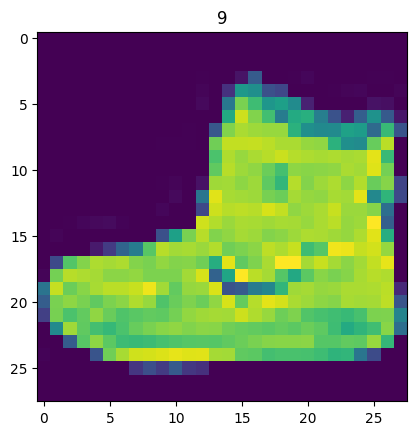

In [12]:
import matplotlib.pyplot as plt
image , label = train_data[0]
plt.imshow(image.squeeze()) # using the squeeze function to remove the single dimension i.e from [1,28,28] to [28,28] to avoid error
plt.title(label)
plt.show()

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

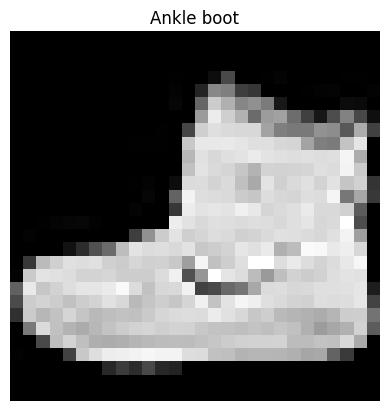

In [13]:
#showing the grey_scale image
plt.imshow(image.squeeze(),cmap = "grey")
plt.title(class_names[label])
plt.axis(False)

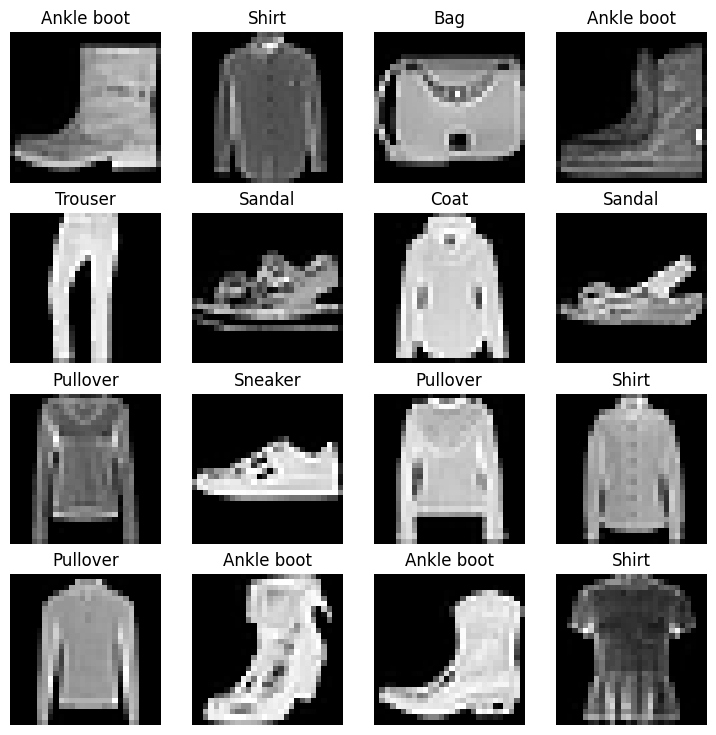

In [14]:
#Visiualizing some more images to get a better preview of the train_data
torch.manual_seed(42) #setting random seed so that every time we get same samples from train data
fig = plt.figure(figsize = (9,9)) #creating a template with width and height
rows , cols = 4 , 4 #total rows and columns in the template

for i in range(1 , rows * cols + 1 ):

  random_index = torch.randint(0 , len(train_data) , size = [1]).item() #everytime ccreating a random number from 0 to 6000(length of training data)
  img , label = train_data[random_index] #finding the image present at that random index
  fig.add_subplot(rows , cols , i) #creating first subplot
  plt.imshow(img.squeeze() , cmap= "gray") #showing the image at that plot
  plt.title(class_names[label]) #setting the title
  plt.axis(False)

**Important Question : Do you think these items of clothing (images) can be modelled with pure linear line ? or Do you think we'll need non-linearities?**

# 2. DataLoader  Overview and Understanding the Mini Batches

1. Right now , we have a PyTorch datasets.
2. DataLoader will transform it into python iterable
3. We need to make batches to data to feed the model
4. Why do we neeed  batches?
 - for using our memory efficiently
 - letting our model to learn more efficiently by goining the the data in batches rather than as a whole.
 - common batch size ia 32

In [15]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset= train_data,batch_size = BATCH_SIZE , shuffle = True)

#shufling true so that our model won't remember the order in which images are present in the dataset rather it focus on underdtanding the patern in each image

test_dataloader = DataLoader(dataset = test_data , batch_size = BATCH_SIZE , shuffle = False)

In [16]:
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79a1ca58d590>,
 <torch.utils.data.dataloader.DataLoader at 0x79a1d80db5d0>)

In [17]:
#let's check what we did
print(f"length of train_data : {len(train_dataloader)} batches of {BATCH_SIZE}....")
print(f"length of test data : {len(test_dataloader)} batches of {BATCH_SIZE}....")

length of train_data : 1875 batches of 32....
length of test data : 313 batches of 32....


In [18]:
#let's check what is inside the dataloader
#next(iter(train_dataloader)) #getting a single batch from train_dataloader. It outputs a tuple of features (images) and their labels
train_features_batch , train_labels_batch= next(iter(train_dataloader))

len(train_features_batch) , len(train_labels_batch)
train_features_batch.shape #[batchsize , color-chennel , height , width] for each batch

torch.Size([32, 1, 28, 28])

Image size : torch.Size([1, 28, 28])
Label size : torch.Size([])


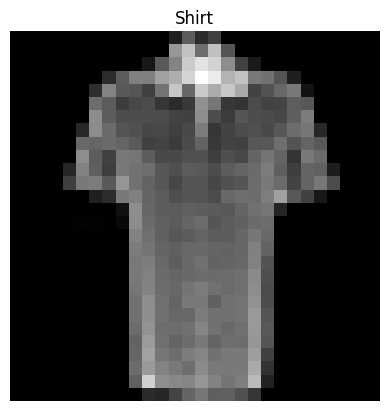

In [19]:
#show a sample image from any batch
torch.manual_seed(42)
random_idx = torch.randint(0 , len(train_features_batch),size= [1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap = "grey")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label size : {label.shape}")

#  3. Model 0 : Creating a baseline with two linear layers

When we are experimenting with the different machine learning modelling technique , the it is the best approach to start with the simple baseline model and the improve upon with sunsequent models .

In [20]:
# creating the faltten model or instantiate it
flatten_model = nn.Flatten()

#getting a sample or some image
x = train_features_batch[0]
output = flatten_model(x)

print(f"Shape before flattening :{x.shape}")
print(f"Shape after flattening :{output.shape}")


Shape before flattening :torch.Size([1, 28, 28])
Shape after flattening :torch.Size([1, 784])


In [21]:
#Defining the model class
from torch import nn

class FashionMNISTmodelv0(nn.Module):

  def __init__(self , input_shape:int ,
               hidden_units : int ,
               output_shape : int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape , out_features = hidden_units),
        nn.Linear(in_features = hidden_units , out_features = output_shape))

  def forward(self,x):
    return self.layer_stack(x)


In [22]:
#instantitiate the model class
torch.manual_seed(42)

model_0 = FashionMNISTmodelv0(input_shape = 784 , #this is 28*28
                              hidden_units =10,
                              output_shape = len(class_names)
                              ).to("cpu")
model_0

FashionMNISTmodelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
#dummy
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## 3.1 Setup the loss , Optimizer and evaluation Metric:
- Loss Function for multiclass classification : nn.CrossEntropyLoss()
- Optimizer : torchh.optim.SGD()
- Evaluation Metric : Accuracy()

In [24]:
#import helper functions
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print("helper_functions.py already exists , skipping downloading")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_function.py" ,"wb") as f:
    f.write(request.content)


downloading helper_functions.py


In [25]:
#Import accuracy Metic
from helper_function import accuracy_fn

In [26]:
#Set up the loss function
loss_fn = nn.CrossEntropyLoss()

#set up the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

**Note: Before creating a training loop , let us first create a function to time our experiments**

A model's performance is measured by two ways:
1. By some evaluation metric
2. How fast it runs

## 3.2 Creating a function to time our experiments  

In [27]:
#defining a train time function to get to know how much time is being taken by our model to get trained

from timeit import default_timer as timer
def print_train_time(start :float ,
                     end :float ,
                     device : torch.device = None):
  """ prints the difference between start and the end time"""
  total_time = end - start
  print(f"Train Time on {device} : {total_time:.3f} seconds")
  return total_time

In [28]:
start_time = timer()
# some piece of code
end_time = timer()


#calling the function with the arguments
print_train_time(start_time , end_time , "cpu")

Train Time on cpu : 0.000 seconds


5.919899999184963e-05

## 3.3 Creating Training loop and training the model on batches

1. Loop thorugh the epochs
2. Loop thorugh all the training batches
3. Perform training steps
4. Calculate training loss per batch
5. Loop through the testing batches
6. Perform the testing steps
7. Calculate the test loss per batch
8. Print out what is happening
9. Time it all

In [29]:
#from  tqdm.auto import tqdm # for creating progress bar to track the training

#set random seed
torch.manual_seed(42)
#set the trauning start time
train_time_start_on_cpu = timer()

#set the epochs(keeping it small for faster training)
epochs = 3

#create atraining and test loop
#for epoch in tqdm(range(epochs)) #run this way if you want to show progress bar for each epoch . i am removing it because it is not supported in pushing to github

for epoch in range(epochs):
  print(f"Epoch: {epoch}\n-------")

  #training loop
  train_loss = 0

  #Add a loop to loop to training batches
  for batch , (X ,y) in enumerate(train_dataloader):
    model_0.train()
    #forward pass
    y_pred = model_0(X)

    #calculate the loss per batch
    loss = loss_fn(y_pred , y)
    train_loss +=loss

    #set the optimizer
    optimizer.zero_grad()

    #back propagation
    loss.backward()

    #Optimizer
    optimizer.step()

    #Print out what is happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

  #Divide total train loss by length of the train dataloader
  train_loss /= len(train_dataloader)

  #Testing
  test_loss , test_acc = 0 , 0
  model_0.eval()
  with torch.inference_mode():
    for X_test , y_test in test_dataloader :
     #forward pass
      test_pred = model_0(X_test)

      #calculate loss
      test_loss += loss_fn(test_pred , y_test)

      #calculate accuracy
      test_acc += accuracy_fn(y_test , test_pred.argmax(dim=1))

    #calculate the test loss per epoch
    test_loss /= len(test_dataloader)

    #calculate the test accuracy per epoch
    test_acc /= len(test_dataloader)

  #print out what is happening
  print(f"\n Train loss :{train_loss:.4f} | Test loss :{test_loss:.4f} | Test Accuracy :{test_acc:.4f}")

#Calculate the training time

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,
                                            train_time_end_on_cpu,
                                            str(next(model_0.parameters()).device))

Epoch: 0
-------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 Train loss :0.5904 | Test loss :0.5095 | Test Accuracy :82.0387
Epoch: 1
-------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 Train loss :0.4763 | Test loss :0.4799 | Test Accuracy :83.1969
Epoch: 2
-------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 Train loss :0.4550 | Test loss :0.4766 | Test Accuracy :83.4265
Train Time on cpu : 33.995 seconds


# 4 . Prediction and Evaluation

In [69]:
torch.manual_seed(42)
def eval_model(
    model: torch.nn.Module,
    data_loader : torch.utils.data.DataLoader,
    loss_fn : torch.nn.Module,
    accuracy_fn):

  """ Returns a dictionary containing the results of the model predicting on data_loader """

  loss , acc = 0,0
  model.eval()

  with torch.inference_mode():
    #for X , y in tqdm(data_loader): #run this way if you want to show progress bar for each epoch . i am removing it because it is not supported in pushing to github
    for X , y in data_loader:
      #Make Prediction
      y_pred = model(X)

      # Accumulate loss and the accuracy
      loss += loss_fn(y_pred , y)

      acc += accuracy_fn(y , y_pred.argmax(dim=1))

    #Scale loss and acc to find the acc/loss per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__ ,
          "model_loss" : loss.item() ,
          "model_accuracy" : acc}

#calculate the results for model 0
model_0_results = eval_model(model_0 ,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn)

model_0_results



{'model_name': 'FashionMNISTmodelv0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

# 5. Set up device agnoistic code

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 6. Improve through Experimentation
- ## Model 1 : Creating a model with non_linear functions

In [70]:
#Creating the model_1 eith non_linear and linear layers
class FashionMNISTmodelv1(torch.nn.Module):
  def __init__(self , input_shape:int,
               hidden_units :int,
               output_shape: int):
    super().__init__()

    self.stack_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape ,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units ,
                  out_features = output_shape),
        nn.ReLU()
    )

  #creating a forward function
  def forward(self , x:torch.Tensor):
    return self.stack_layer(x)


In [71]:
#instantitiate the class FashionMNISTmodelv1
model_1 = FashionMNISTmodelv1(784 , 10 , len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

## 6.1 Set up loss , optimizer and evaluation metrics for this


In [72]:
#accuracy function for evaluation
from helper_function import accuracy_fn
#setup the loss function
loss_fn = nn.CrossEntropyLoss()
#set up the optimzer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

## 6.2  Creating a Training and testing Loop
  - **Functionalizing the training and testing loop**
      - for training : train_step()
      - for testing : test_step()


In [73]:
def train_step(model : torch.nn.Module ,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device ):

  """Performs a training with model trying to learn on data loader"""
  train_loss , train_acc = 0 , 0

  #  Put the model into training mode
  model.train()

  #Add a loop to loop through the training batches
  for batch , (X ,y) in enumerate(data_loader):
    #put data into target device
    X , y = X.to(device) , y.to(device)

    #forward pass
    y_pred = model(X)

    #calculate the loss and accuracy per batch
    loss = loss_fn(y_pred , y)
    train_loss += loss
    train_acc += accuracy_fn(y , y_pred.argmax(dim=1)) # go from logits -> prediction labels

    #set the optimizer
    optimizer.zero_grad()

    #back propagation
    loss.backward()

    #Optimizer
    optimizer.step()

  #Divide total train loss and acc by length of the train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  #Print out what is happening

  print(f"Train Loss: {train_loss:.5f} | Train accuracy :{train_acc:.5f}%")


In [74]:
def test_step(model:torch.nn.Module ,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device= device):

  """Performs a testing on the model to predict on the testing data loader"""
  #Testing
  test_loss , test_acc = 0 , 0
  model.eval()

  with torch.inference_mode():
    for X , y in data_loader :
      #send X and y to target device
      X, y = X.to(device) , y.to(device)

     #forward pass
      test_pred = model(X)

      #calculate loss
      test_loss += loss_fn(test_pred , y)

      #calculate accuracy
      test_acc += accuracy_fn(y , test_pred.argmax(dim=1))

    #Adjust metrics and print out
    #calculate the test loss per epoch
    test_loss /= len(data_loader)

    #calculate the test accuracy per epoch
    test_acc /= len(data_loader)

    #print out what is happening
    print(f"\n Test loss :{test_loss:.4f} | Test acc :{test_acc:.2f}% \n")



In [75]:
#combining the two functions
torch.manual_seed(42)
# measure time

from timeit import default_timer as Timer
train_time_start_on_gpu = timer()

#for epoch in tqdm(range(epochs)): ##run this way if you want to show progress bar for each epoch . i am removing it because it is not supported in pushing to github

for epoch in range(epochs):
  print(f"Epoch :{epoch}\n-----------")
  train_step(model_1,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model_1,
             test_dataloader,
             loss_fn,
             accuracy_fn,
             device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,
                                            train_time_end_on_gpu,
                                            device)

Epoch :0
-----------
Train Loss: 0.98248 | Train accuracy :65.06000%

 Test loss :0.7606 | Test acc :72.80% 

Epoch :1
-----------
Train Loss: 0.70366 | Train accuracy :74.48000%

 Test loss :0.7173 | Test acc :73.67% 

Epoch :2
-----------
Train Loss: 0.67375 | Train accuracy :75.30500%

 Test loss :0.6917 | Test acc :74.81% 

Train Time on cpu : 34.945 seconds


**Note : Sometimes , depending on your data/hardware you might find that your model trains faster on CPU than GPU .
Why this?**
 - This is because that the overhead for copying the data / model to and from the GPU outweights the compute benefits offered by the GPU.
 - The hardware you are using has a better CPU in terms of copute capability than the GPU.

In [79]:
torch.manual_seed(42)
def eval_model(
    model: torch.nn.Module,
    data_loader : torch.utils.data.DataLoader,
    loss_fn : torch.nn.Module,
    accuracy_fn,
    device = device):

  """ Returns a dictionary containing the results of the model predicting on data_loader """

  loss , acc = 0,0
  model.eval()

  with torch.inference_mode():

    #for X , y in tqdm(data_loader):#run this way if you want to show progress bar for each epoch . i am removing it because it is not supported in pushing to github

    for X , y in data_loader:
      #Make device agnoistic code
      X, y = X.to(device) , y.to(device)
      #Make Prediction
      y_pred = model(X)

      # Accumulate loss and the accuracy
      loss += loss_fn(y_pred , y)

      acc += accuracy_fn(y , y_pred.argmax(dim=1))

    #Scale loss and acc to find the acc/loss per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__ ,
          "model_loss" : loss.item() ,
          "model_accuracy" : acc}

In [77]:
model_1_results = eval_model(model_1,test_dataloader,loss_fn,accuracy_fn , device)
model_1_results

{'model_name': 'FashionMNISTmodelv1',
 'model_loss': 0.6917040348052979,
 'model_accuracy': 74.810303514377}

In [80]:
model_0_results

{'model_name': 'FashionMNISTmodelv0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

# 7. Modelv2 - Convolutional Neural Network(high level overview)

- CNNs are also known as ConvNets .
- They are known for their capabilities to find patterns in visiual data.

In [81]:
#create a convolutional neural network.
class FashionMNISImodelv2(nn.Module):

  """ Model architecture that replicates the TinyVGG model from CNn explainer website """

  def __init__(self, input_shape : int ,
               hidden_units : int ,
               output_shape: int):
    super().__init__()

    #covolutional block 1
    self.conv_block_1 = nn.Sequential(
        #create a convolutional layer 1
        nn.Conv2d(in_channels = input_shape ,
                  out_channels = hidden_units ,
                  kernel_size =3,
                  stride =1,
                  padding =1),
        #nn.ReLU() layer
        nn.ReLU(),
        #convolutional layer 2
        nn.Conv2d(
            in_channels = hidden_units ,
            out_channels = hidden_units ,
            kernel_size = 3,
            stride = 1,
            padding = 1),
        #nn.ReLU layer
        nn.ReLU(),
        #maxPool layer
        nn.MaxPool2d(kernel_size = 2)
    )

    #convolutional block 2
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units ,
                  out_channels = hidden_units,
                  kernel_size= 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units ,
                 out_channels = hidden_units,
                 kernel_size = 3 ,
                 stride = 1,
                 padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    #classifier block

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,  #there is trick
                  out_features = output_shape )
    )

  #forward function
  def forward(self , x):
    x=self.conv_block_1(x)
    #print(f"output shape of conv block 1: {x.shape}")
    x= self.conv_block_2(x)
    #print(f"output shape of conv block 2: {x.shape}")
    x= self.classifier(x)
    #print(f"output shape of classifier: {x.shape}")
    return x



In [82]:
torch.manual_seed(42)
model_2 = FashionMNISImodelv2(input_shape = 1 ,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)



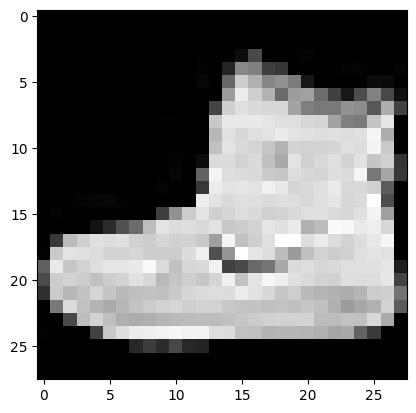

In [43]:
plt.imshow(image.squeeze() , cmap = "gray")

In [44]:
rand_image_tensor = torch.randn(size = (1, 28 ,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [45]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

##7.1 Stepping Through `nn.Conv2d()`




In [83]:
#create a batch of images
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape : {images.shape}")
print(f"Single Image shape : {test_image.shape}")
print(f"Test Image look like : \n {test_image}")

Image batch shape : torch.Size([32, 3, 64, 64])
Single Image shape : torch.Size([3, 64, 64])
Test Image look like : 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

In [47]:

#create a single convolutional layer (Conv2d) (3, 64,64) in_chennes will be color chennels
conv_layer = nn.Conv2d(in_channels = 3 ,
                       out_channels = 10 ,
                       kernel_size = 3,
                       stride = 1,
                       padding = 1
)

#pass the data through the conv layer
conv_output = conv_layer(test_image)
#conv_output

In [48]:
conv_output.shape , test_image.shape

(torch.Size([10, 64, 64]), torch.Size([3, 64, 64]))

##  7.2 Stepping Thorugh `nn.MaxPool2d()`

In [49]:
#sample image
print(f"shape of the sample image : {test_image.shape}")

# Create a sample MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

#pass the data through Conv2d layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape of test image after passing through the Conv2d layer: {test_image_through_conv.shape}")

#pass through the max pool layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape of the test_image after passing through conv and max_pool :{test_image_through_conv_and_maxpool.shape}")


shape of the sample image : torch.Size([3, 64, 64])
Shape of test image after passing through the Conv2d layer: torch.Size([10, 64, 64])
Shape of the test_image after passing through conv and max_pool :torch.Size([10, 32, 32])


In [50]:
#let's check closely what max pool layer actually doing and how compressing the feature space
#just repeting the code we just wrote
torch.manual_seed(42)

#create a random tensor
random_tensor = torch.randn(size=(1,2,2))
print(f"\nRandom Tensor: \n {random_tensor}")
print(f"shape before passing to max_pool layer : {random_tensor.shape}")

#create a max pool tensor
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax Pool Tensor : \n {max_pool_tensor}")
print(f"shape after passing to max_pool_layer : {max_pool_tensor.shape}")


Random Tensor: 
 tensor([[[0.3367, 0.1288],
         [0.2345, 0.2303]]])
shape before passing to max_pool layer : torch.Size([1, 2, 2])

Max Pool Tensor : 
 tensor([[[0.3367]]])
shape after passing to max_pool_layer : torch.Size([1, 1, 1])


# 7.3 Set up loss function and optimizer for model_2
 - set up loss function
 - set up optimizer
 - set up the evaluation metric

In [84]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters() ,
                            lr = 0.1)

## 7.4 Training and Testing model_2 using training and testing functions

In [85]:
#combining the two functions
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as Timer
train_time_start_on_gpu = timer()

#for epoch in tqdm(range(epochs)): ##run this way if you want to show progress bar for each epoch . i am removing it because it is not supported in pushing to github

for epoch in range(epochs):
  print(f"Epoch :{epoch}\n-----------")
  train_step(model_2,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model_2,
             test_dataloader,
             loss_fn,
             accuracy_fn,
             device)

train_time_end_on_gpu = timer()
total_train_time_model_2 = print_train_time(train_time_start_on_gpu,
                                            train_time_end_on_gpu,
                                            device)

Epoch :0
-----------
Train Loss: 0.59518 | Train accuracy :78.37500%

 Test loss :0.3950 | Test acc :85.99% 

Epoch :1
-----------
Train Loss: 0.36536 | Train accuracy :86.90167%

 Test loss :0.3524 | Test acc :86.91% 

Epoch :2
-----------
Train Loss: 0.32588 | Train accuracy :88.12833%

 Test loss :0.3272 | Test acc :88.07% 

Train Time on cpu : 178.942 seconds


In [88]:
#Get model_2 results dictionary
model_2_results = eval_model(
    model_2 ,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device
)

model_2_results

{'model_name': 'FashionMNISImodelv2',
 'model_loss': 0.32718968391418457,
 'model_accuracy': 88.06908945686901}

In [89]:
model_0_results

{'model_name': 'FashionMNISTmodelv0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

# 8. Comparing Model results and Training time

In [90]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTmodelv0,0.476639,83.426518
1,FashionMNISTmodelv1,0.691704,74.810304
2,FashionMNISImodelv2,0.327190,88.069089


In [91]:
#Add training time column in the dataframe
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

In [92]:
compare_results


,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTmodelv0,0.476639,83.426518,33.994543
1,FashionMNISTmodelv1,0.691704,74.810304,34.944731
2,FashionMNISImodelv2,0.327190,88.069089,178.942332


Note : training time for model_2 is too high . It is because it is being trained on CPU due to GPU free quota limit exceed

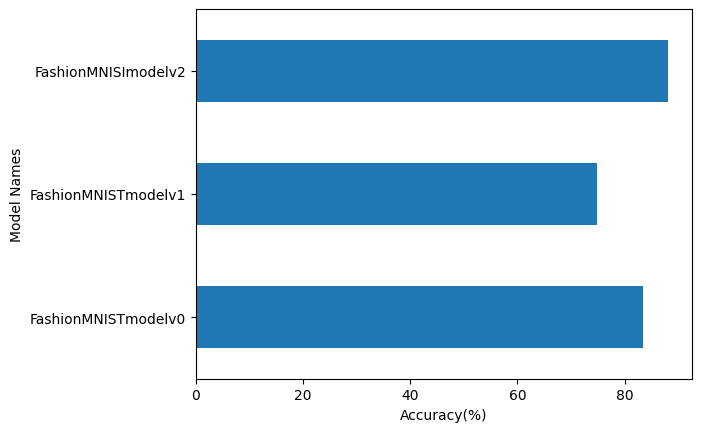

In [97]:
#visiulaize
compare_results.set_index("model_name")["model_accuracy"].plot(kind = "barh")
plt.xlabel("Accuracy(%)")
plt.ylabel("Model Names")
plt.show()

# 9. Make and Evaluate random predictions with the best model

In [98]:
#prediction Function

def make_predictions(model: torch.nn.Module ,
                     data : list,
                     device: torch.device=device):

  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data :
      #create sample(add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim= 0).to(device)

      #forward pass (model otputs raw logits)
      pred_logits = model(sample)

      #prediction probabilies from raw logits
      pred_prob = torch.softmax(pred_logits.squeeze() , dim = 0)

      #get probabilies off to the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    #stack the pred_probs to turn the list to tensor
    return torch.stack(pred_probs)

In [103]:
#looking at our test data
# we have to choose some random samples from this test data
img , label = test_data[0][:10]
img.shape , label

(torch.Size([1, 28, 28]), 9)

In [139]:
#calling the functions on random samples from test_data
import random
random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data) , k=9):
  test_samples.append(sample)
  test_labels.append(label)

#view the first sample image
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

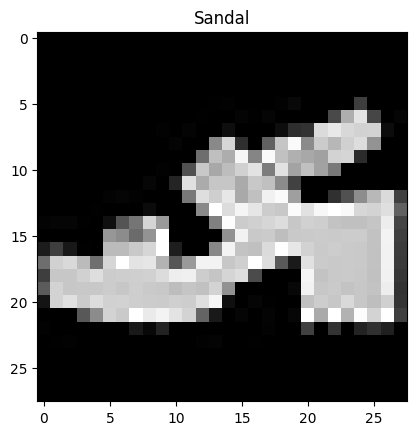

In [140]:
#visiualize
plt.imshow(test_samples[0].squeeze() , cmap= "grey")
plt.title(class_names[test_labels[0]])

In [141]:
#Make Predictions

pred_probs = make_predictions(model_2 ,
                              test_samples)
#view first two prediction probabilities
pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

In [142]:
#convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes , test_labels

(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

## Visiualize the predictions


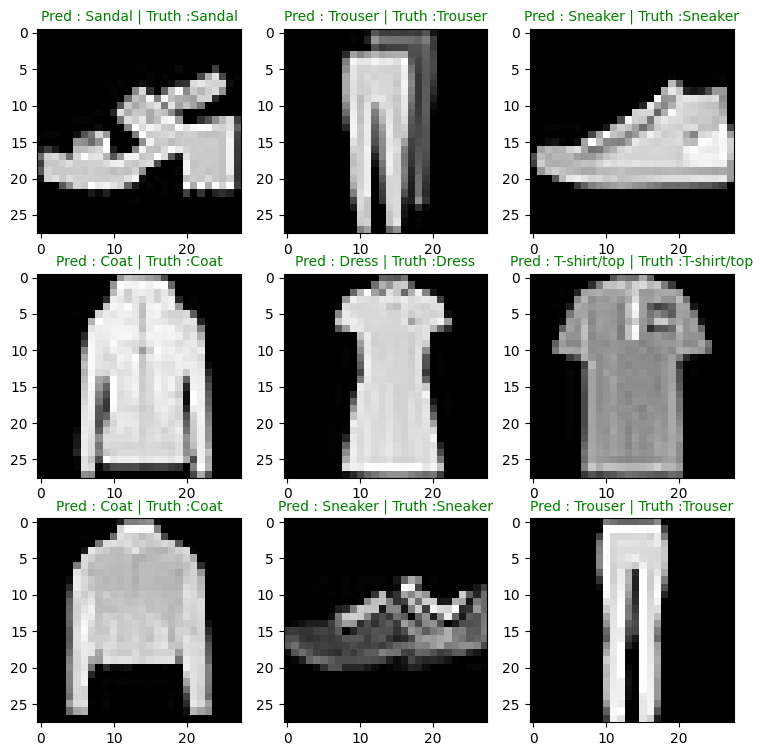

In [143]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i , sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows , ncols , i+1)

  #plot the target image
  plt.imshow(sample.squeeze() , cmap= "grey")

  #Find the predictions in text form
  pred_label = class_names[pred_classes[i]]

  #get the truth label
  truth_label = class_names[test_labels[i]]

  #create a title for th plot
  title_text = f"Pred : {pred_label} | Truth :{truth_label}"

  #check for equality
  if pred_label == truth_label :
    plt.title(title_text , fontsize = 10 , c="g")

  else :
    plt.title(title_text , fontsize = 10 , c="r")






# 10. Making a confusion matrix for furthur prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification model visiually.

1. Make predictions with our trained model on test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix

In [154]:
#from tqdm.auto import tqdm
 #Make predictions

y_preds =[]
model_2.eval()
with torch.inference_mode():
  for X , y in test_dataloader:
    #Send data to the target device
    X , y = X.to(device) , y.to(device)

    #Do the forward pass
    y_logits = model_2(X)

    #logits to prediction probabilities
    y_pred = torch.softmax(y_logits.squeeze() , dim = 0).argmax(dim = 1)

    #put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

  #concatenate list of predictions into a tensor
  #print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 8])

In [155]:
len(y_pred_tensor)

10000

In [157]:
#installing torchmetrics
# see if required packages are installed and if not , install them...
try :

  import torchmetrics , mlxtend
  print(f"mlxtend version : {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19 , 'mlxtend version should be 0.19 or higher')

except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics , mlxtend
  print(f"mlxtend version is :{mlxtend.__version__}")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 511.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.1 MB/s eta 0:00:00
mlxtend version is :0.23.4


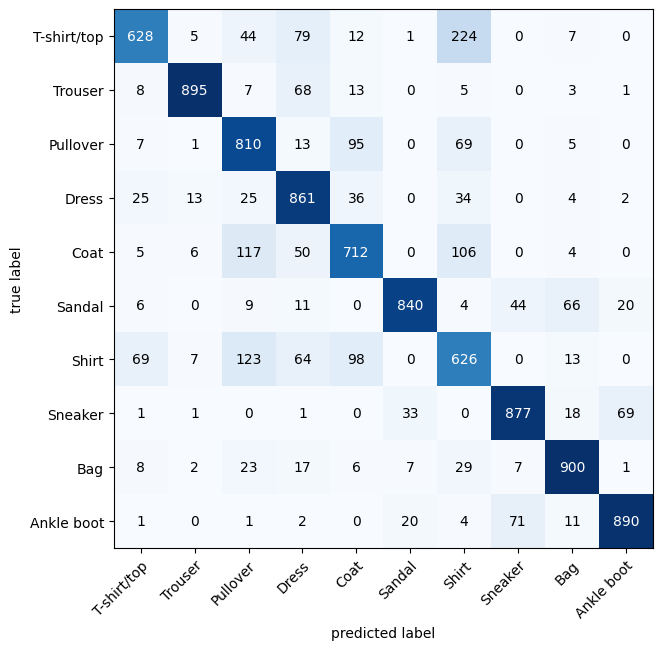

In [161]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names) , task = "multiclass")
confmat_tensor = confmat(preds = y_pred_tensor ,
                         target = test_data.targets)

#plotting confusion matrix
fig , ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy() ,
    class_names = class_names,
    figsize =(10,7)
)


# 11. Save and load best performing model

In [164]:
from pathlib import Path
#create a directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True , exist_ok = True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict() , f=MODEL_SAVE_PATH)


saving model to :models/03_pytorch_computer_vision_model_2.pth


In [165]:
#checking if the model saved or not
torch.manual_seed(42)
#Create a new instance of the class
loaded_model_2 = FashionMNISImodelv2(input_shape = 1,
                                   hidden_units = 10,
                                   output_shape = len(class_names))

#load in the save state_dict()
loaded_model_2.load_state_dict( torch.load(f= MODEL_SAVE_PATH))

#send model to target device
loaded_model_2.to(device)

FashionMNISImodelv2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [166]:
model_2_results

{'model_name': 'FashionMNISImodelv2',
 'model_loss': 0.32718968391418457,
 'model_accuracy': 88.06908945686901}

In [168]:
#Evaluate loaded model
torch.manual_seed(42)
loaded_model_2.to(device)

loaded_model_2_results = eval_model(
    loaded_model_2,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device)

loaded_model_2_results

{'model_name': 'FashionMNISImodelv2',
 'model_loss': 0.32718968391418457,
 'model_accuracy': 88.06908945686901}

In [170]:
#check if model results are close to each other or not

torch.isclose(torch.tensor(model_2_results["model_loss"]) ,
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-05
              )

tensor(True)